## Exploration of Sport Teams in Detroit
The City of Detroit is famous and has a long history, I am going to find some data of the sport teams and do some analysis on them. This projecrt includes:
* Exploratory Data Analysis (EDA) of the Sport Teams' Win Rate Changes, and the Economic indexes of Detroit.
* Summary to the performance of sport teams.

## Part 1. Collect the data of Sport Teams
### Step1. Read and load the data from website

In [652]:
# import necessary python tools
import pandas as pd
import numpy as np
import requests
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [653]:
# To read the website data, it may be needed to updated the web certificate.
# Please check if there is an error, and use 'cmd' to install ca-certificates by: pip install certifi==2020.4.5.1 (may need to uninstall at first: pip uninstall -y certifi)

# get the first data
link_1 = 'https://en.wikipedia.org/wiki/List_of_Detroit_Pistons_seasons'
BS_1 = BeautifulSoup(requests.get(link_1).text)
# selecting data by the index: tr,th and td
column_headers_1 = [th.getText() for th in BS_1.findAll('tr',limit=2)[1].findAll('th')]
data_rows_1 = BS_1.findAll('tr')[2:]
player_data_1 = [[td.getText() for td in data_rows_1[i].findAll('td')] for i in range(len(data_rows_1))]

In [654]:
# output and check the dataframe
DF_1 = pd.DataFrame(player_data_1,columns = column_headers_1)
# arrange the data index
DF_1.columns = DF_1.columns.str.replace(r'\n','')
DF_1.head()

,NBA Season,Team Season,Conference,Finish,Division,Finish,Wins,Losses,Win%,GB,Playoffs,Awards
0,Fort Wayne Pistons\n,None,None,None,None,None,None,None,None,None,None,None
1,1948–49,1948–49,,,Western,5th,22,38,.367,23,,\n
2,1949–50,1949–50,,,Central,4th,40,28,.588,11,Won Division Semifinals (Royals) 2–0 Lost Divi...,\n
3,1950–51,1950–51,,,Western,3rd,32,36,.471,12,Lost Division Semifinals (Royals) 2–1,\n
4,1951–52,1951–52,,,Western,4th,29,37,.439,12,Lost Division Semifinals (Royals) 2–0,\n


### Explanation of Indexes :
*
*
*
*


### Step2. Data Cleaning, drop unrelated infromation and fix null values

In [655]:
# select the data to analyze, assumed the purpose is to analyze past win rate and predict the future's
DF_1_data = DF_1.iloc[:,[1,4,5,8]]
DF_1_data = DF_1_data.dropna()
DF_1_data.rename(columns = {'Team Season':'Season','Division':'Pistons_Division',
                            'Finish':'Pistons_Finish','Win%':'Pistons_Win_rate'},inplace = True)

In [656]:
# check the last rows of the data.
DF_1_data.tail(20)
# row 78-95 have wrong format, the website table includes other extra information.

,Season,Pistons_Division,Pistons_Finish,Pistons_Win_rate
72,2018–19,Central,3rd,.500
73,2019–20,Central,4th,.303
78,,1942–43,1943–44,1946–47
79,,1943–44,1944–45,1947–48
80,1949–50,1952–53,1953–54,1956–57
81,1950–51,1953–54,1954–55,1957–58
82,1959–60,1962–63,1963–64,1966–67
83,1960–61,1963–64,1964–65,1967–68
84,1969–70,1972–73,1973–74,1976–77
85,1970–71,1973–74,1974–75,1977–78


In [657]:
# delete wrong rows
DF_1_data = DF_1_data.drop(DF_1_data.index[-18:])

In [658]:
# convert the value to numeric so it is able to do calculation
DF_1_data['Pistons_Win_rate'] = pd.to_numeric(DF_1_data['Pistons_Win_rate'])
# format the data type
DF_1_data = DF_1_data.replace('–.*','',regex=True)
DF_1_data['Pistons_Finish'] = DF_1_data['Pistons_Finish'].apply(lambda x: x[0:1])
DF_1_data['Pistons_Finish'] = pd.to_numeric(DF_1_data['Pistons_Finish'])
DF_1_data['Season'] = pd.to_numeric(DF_1_data['Season'])
DF_1_data.tail()

,Season,Pistons_Division,Pistons_Finish,Pistons_Win_rate
69,2015,Central,3,0.537
70,2016,Central,5,0.451
71,2017,Central,4,0.476
72,2018,Central,3,0.500
73,2019,Central,4,0.303


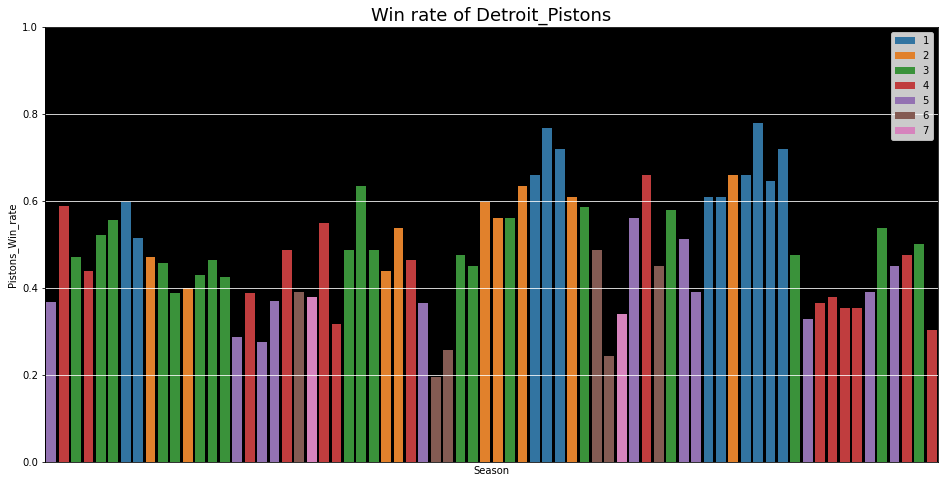

In [659]:
# examine the data quality
# See how the figure looks like
plt.figure(figsize = (16,8))
ax = sns.barplot(x="Season", y="Pistons_Win_rate", data=DF_1_data, hue = 'Pistons_Finish',dodge=False)
ax.set_facecolor("k")
ax.set(xticks = [])
plt.grid(True,color="w",alpha=1)
plt.title("Win rate of Detroit_Pistons",color='k',fontsize=18)
plt.ylim(0,1)
plt.legend(loc='upper right')
plt.show()

c:\users\xiang fu\appdata\local\programs\python\python38-32\lib\site-packages\seaborn\relational.py:918: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.
  scout = ax.scatter([], [], **kws)
c:\users\xiang fu\appdata\local\programs\python\python38-32\lib\site-packages\seaborn\relational.py:955: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.
  points = ax.scatter(*args, **kws)


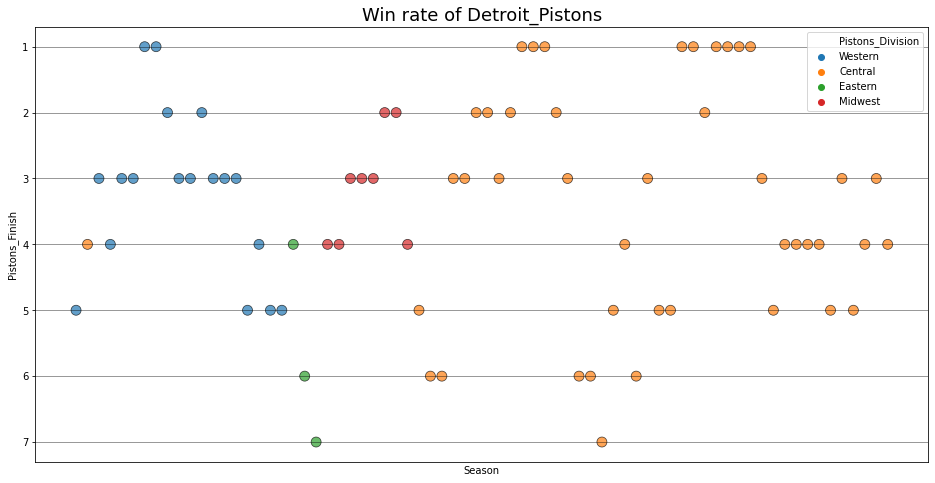

In [660]:
plt.figure(figsize = (16,8))
ax = sns.scatterplot(x="Season", y="Pistons_Finish",hue = 'Pistons_Division', data=DF_1_data, s=100,alpha=0.7,edgecolor="k"*len(DF_1_data))
ax.set_facecolor("w")
ax.set(xticks = [])
ax.invert_yaxis()
plt.grid(True,color="k",alpha=0.5)
plt.title("Win rate of Detroit_Pistons",color='k',fontsize=18)
plt.show()

### Step2-continue. Clean the data for other links

*Each data have to be examined to make sure the integrity and validation 

In [661]:
# get the data for other 3 sport teams in detroit
link_2 = 'https://en.wikipedia.org/wiki/List_of_Detroit_Red_Wings_seasons'
link_3 = 'https://en.wikipedia.org/wiki/List_of_Detroit_Tigers_seasons'
link_4 = 'https://en.wikipedia.org/wiki/List_of_Detroit_Lions_seasons'
BS_2 = BeautifulSoup(requests.get(link_2).text)
BS_3 = BeautifulSoup(requests.get(link_3).text)
BS_4 = BeautifulSoup(requests.get(link_4).text)

In [662]:
# Read the data in website at first;
# Check the web code, select data by their index such as tr,th and td; 

# link_2 has a complicated data table, the needed data begin at line 17,18
column_headers_2 = [th.getText() for th in BS_2.findAll('tr')[17].findAll('th')]
# deal with the secondary column
column_headers_2_2 = [th.getText() for th in BS_2.findAll('tr')[18].findAll('th')]
# use the secondary column, I think this part can be done in MS Excel, 
# another option is to save the above data and upload to SQL database
column_headers_2.remove('Regular season[3][6][7][8]\n')
column_headers_2.remove('Postseason\n')
m = 4
for n in column_headers_2_2:
    column_headers_2.insert(m,n)
    m += 1

data_rows_2 = BS_2.findAll('tr')[19:]
player_data_2 = [[td.getText() for td in data_rows_2[i].findAll('td')] for i in range(len(data_rows_2))]

# Do so for link_3
column_headers_3 = [th.getText() for th in BS_3.findAll('tr')[31].findAll('th')]
data_rows_3 = BS_3.findAll('tr')[32:]
player_data_3 = [[td.getText() for td in data_rows_3[i].findAll('td')] for i in range(len(data_rows_3))]
column_headers_3.remove('Season\n')
# match the number of columns for the dataframe
n = 0
while n<4:
    column_headers_3.append("")
    n += 1

# link_4
column_headers_4 = [th.getText() for th in BS_4.findAll('tr',limit=2)[1].findAll('th')]
column_headers_4_2 = [th.getText() for th in BS_4.findAll('tr',limit=3)[2].findAll('th')]

column_headers_4.remove('Regular season\n')
column_headers_4.remove('NFL season\n')
m = 4
for n in column_headers_4_2:
    column_headers_4.insert(m,n)
    m += 1

data_rows_4 = BS_4.findAll('tr')[2:]
player_data_4 = [[td.getText() for td in data_rows_4[i].findAll('td')] for i in range(len(data_rows_4))]


In [680]:
# clean the data for link_2
import string # for a to z

DF_2 = pd.DataFrame(player_data_2,columns = column_headers_2)
DF_2.columns = DF_2.columns.str.replace(r'\n','')
DF_2 = DF_2.replace('\n','',regex=True)

# clear the [a] to [z] marks
chr = list(string.ascii_lowercase)
for i in chr:
    DF_2 = DF_2.replace(i,'', regex=True) 
# clean the []
DF_2 = DF_2.replace(r'\[.*\]','',regex=True)
DF_2 = DF_2.loc[:,['Franchise season','Division','Finish','W', 'L', 'T']]
DF_2 = DF_2.dropna()

DF_2.rename(columns = {'Finish':'Red_Wings_Finish','Division':'Red_Wings_Division'},inplace = True)

# re-arrange the required data
# First do the calculation to find win%
DF_2_data = DF_2.loc[:,['W', 'L', 'T']]
DF_2_data = DF_2_data.loc[:,~DF_2_data.columns.duplicated()]
DF_2_data = DF_2_data.replace('—','0',regex=True)
# convert 'object' to 'float' for calculation
DF_2_data = DF_2_data.astype(float)
DF_2_data.insert(3,'Red_Wings_Win_rate',0)
DF_2_data['Red_Wings_Win_rate'] = (DF_2_data['W']/(DF_2_data['W']+DF_2_data['L']+DF_2_data['T'])).round(3)
# regroup the data

DF_2_data.insert(0,'Season',DF_2['Franchise season'])
DF_2_data.insert(1,'Red_Wings_Division',DF_2['Red_Wings_Division'])
DF_2_data.insert(2,'Red_Wings_Finish',DF_2['Red_Wings_Finish'])
DF_2_data = DF_2_data.loc[:,['Season','Red_Wings_Division','Red_Wings_Finish','Red_Wings_Win_rate']]
# reset the year
DF_2_data = DF_2_data.replace('–.*','',regex=True)
DF_2_data['Season'] = pd.to_numeric(DF_2_data['Season'])


DF_2_data.head()

,Season,Red_Wings_Division,Red_Wings_Finish,Red_Wings_Win_rate
0,1926,A,5,0.273
1,1927,A,4,0.432
2,1928,A,3,0.432
3,1929,A,4,0.318
4,1930,A,4,0.364


In [691]:
# Always check the tail
DF_2_data.tail(20)

,Season,Red_Wings_Division,Red_Wings_Finish,Red_Wings_Win_rate
74,2000,C,1,0.628
75,2001,C,1,0.654
76,2002,C,1,0.615
77,2003,C,1,0.600
78,2004,C,8,NaN
79,2005,C,1,0.784
80,2006,C,1,0.725
81,2007,C,1,0.720
82,2008,C,1,0.708
83,2009,C,2,0.647


In [712]:
# some data missing in 2004, add reasonbal value to fix the blank
DF_2_data['Red_Wings_Finish'][78] = 8
DF_2_data['Red_Wings_Division'][78] = 'C'

DF_2_data['Red_Wings_Finish'] = pd.to_numeric(DF_2_data['Red_Wings_Finish'])

<ipython-input-712-235ffc543b7d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_2_data['Red_Wings_Finish'][78] = 8
<ipython-input-712-235ffc543b7d>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_2_data['Red_Wings_Division'][78] = 'C'


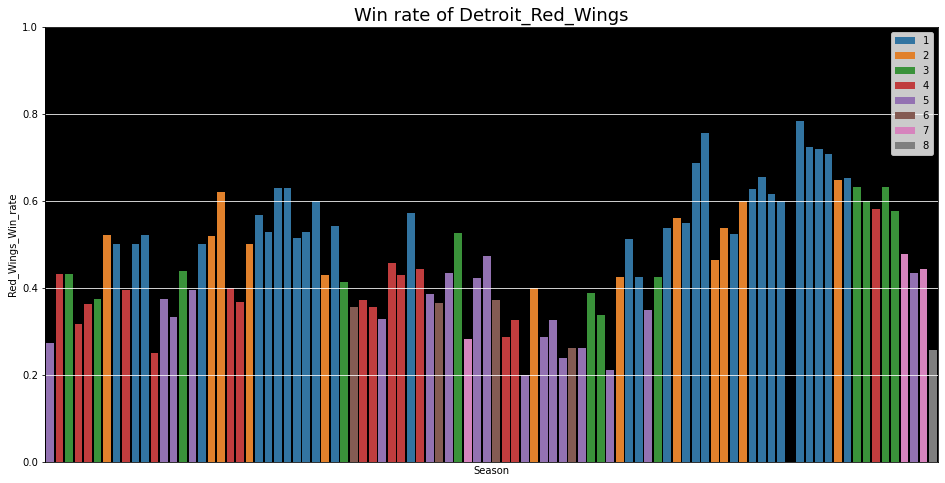

In [713]:
plt.figure(figsize = (16,8))
ax = sns.barplot(x="Season", y="Red_Wings_Win_rate", data=DF_2_data, hue = 'Red_Wings_Finish',dodge=False)
ax.set_facecolor("k")
ax.set(xticks = [])
plt.grid(True,color="w",alpha=1)
plt.title("Win rate of Detroit_Red_Wings",color='k',fontsize=18)
plt.ylim(0,1)
plt.legend(loc='upper right')
plt.show()

c:\users\xiang fu\appdata\local\programs\python\python38-32\lib\site-packages\seaborn\relational.py:918: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.
  scout = ax.scatter([], [], **kws)
c:\users\xiang fu\appdata\local\programs\python\python38-32\lib\site-packages\seaborn\relational.py:955: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.
  points = ax.scatter(*args, **kws)


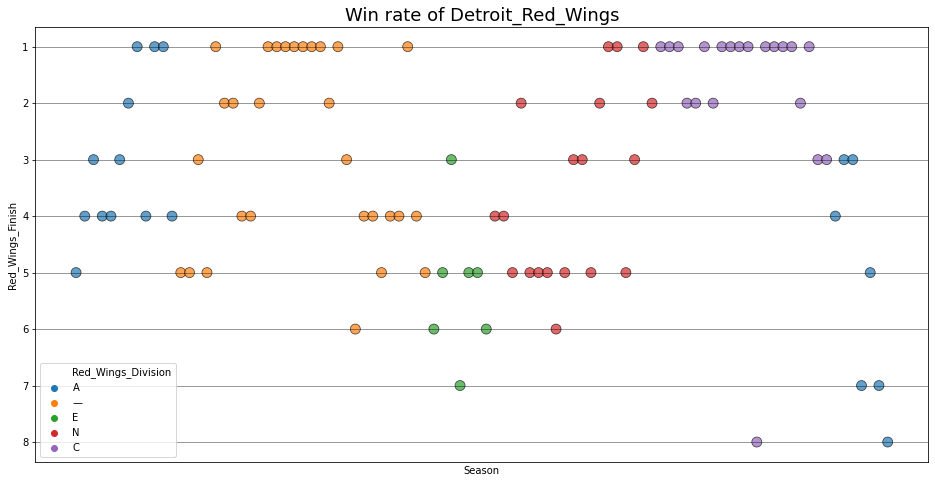

In [714]:
plt.figure(figsize = (16,8))
ax = sns.scatterplot(x="Season", y="Red_Wings_Finish",hue = 'Red_Wings_Division', data=DF_2_data, s=100,alpha=0.7,edgecolor="k"*len(DF_2_data))
ax.set_facecolor("w")
ax.set(xticks = [])
ax.invert_yaxis()
plt.grid(True,color="k",alpha=0.5)
plt.title("Win rate of Detroit_Red_Wings",color='k',fontsize=18)
plt.show()

In [715]:
# clean the data for link_3
DF_3 = pd.DataFrame(player_data_3,columns = column_headers_3)
DF_3.columns = DF_3.columns.str.replace(r'\n','')
DF_3 = DF_3.replace('\n','',regex=True)

# Make the 'Season' column for the data
DF_3.insert(0,'Season',0)
season = []
for i in range (1901,1901+174): # there are 175 rows
    season.append(i)
# The season 1981 has two outcomes, therefore one extrat 1981 row is added
season.append(1981)
season.sort()
DF_3['Season'] = season

# clean the data
DF_3 = DF_3.drop_duplicates(subset ='Season', keep = 'last')
DF_3_data = DF_3.loc[:,['Season','Division','Finish','Win%']]
DF_3_data.rename(columns = {'Win%':'Tigers_Win_rate','Division':'Tigers_Division','Finish':'Tigers_Finish'},inplace = True)
DF_3_data = DF_3_data.dropna()
DF_3_data = DF_3_data.drop(DF_3_data.index[-1])
DF_3_data['Tigers_Win_rate'] = pd.to_numeric(DF_3_data['Tigers_Win_rate'])
DF_3_data['Tigers_Finish'] = DF_3_data['Tigers_Finish'].apply(lambda x: x[0:1])
DF_3_data['Tigers_Finish'] = pd.to_numeric(DF_3_data['Tigers_Finish'])
DF_3_data.head()

,Season,Tigers_Division,Tigers_Finish,Tigers_Win_rate
0,1901,,3,0.548
1,1902,,7,0.385
2,1903,,5,0.478
3,1904,,7,0.408
4,1905,,3,0.516


In [716]:
DF_3_data.tail()

,Season,Tigers_Division,Tigers_Finish,Tigers_Win_rate
115,2015,Central,5,0.460
116,2016,Central,2,0.534
117,2017,Central,5,0.395
118,2018,Central,3,0.395
119,2019,Central,5,0.292


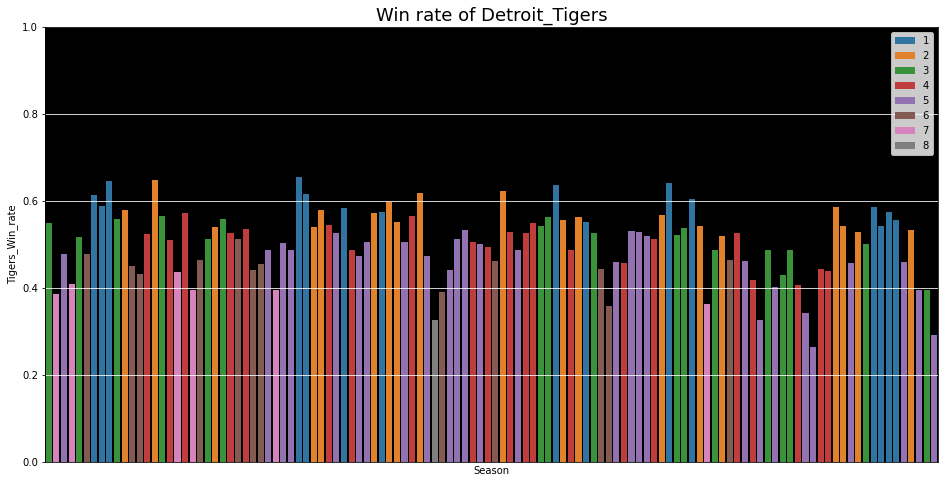

In [717]:
plt.figure(figsize = (16,8))
ax = sns.barplot(x="Season", y="Tigers_Win_rate", data=DF_3_data, hue = 'Tigers_Finish',dodge=False)
ax.set_facecolor("k")
ax.set(xticks = [])
plt.grid(True,color="w",alpha=1)
plt.title("Win rate of Detroit_Tigers",color='k',fontsize=18)
plt.ylim(0,1)
plt.legend(loc='upper right')
plt.show()

c:\users\xiang fu\appdata\local\programs\python\python38-32\lib\site-packages\seaborn\relational.py:918: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.
  scout = ax.scatter([], [], **kws)
c:\users\xiang fu\appdata\local\programs\python\python38-32\lib\site-packages\seaborn\relational.py:955: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.
  points = ax.scatter(*args, **kws)


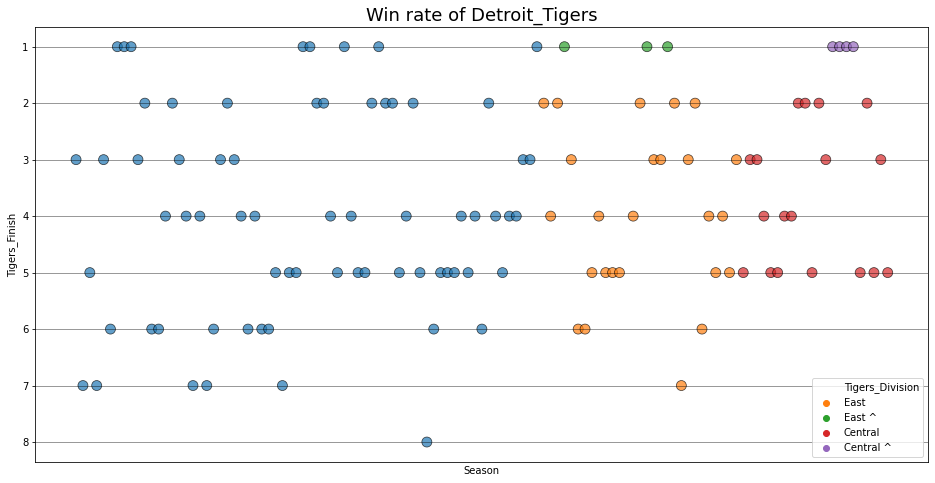

In [718]:
plt.figure(figsize = (16,8))
ax = sns.scatterplot(x="Season", y="Tigers_Finish",hue = 'Tigers_Division', data=DF_3_data, s=100,alpha=0.7,edgecolor="k"*len(DF_2_data))
ax.set_facecolor("w")
ax.set(xticks = [])
ax.invert_yaxis()
plt.grid(True,color="k",alpha=0.5)
plt.title("Win rate of Detroit_Tigers",color='k',fontsize=18)
plt.show()

In [719]:
# clean the data for link_4
DF_4 = pd.DataFrame(player_data_4,columns = column_headers_4)
DF_4.columns = DF_4.columns.str.replace(r'\n','')
DF_4 = DF_4.replace('\n','',regex=True)
DF_4 = DF_4.loc[:,['Team season','Division','Finish','Wins', 'Losses', 'Ties']]
DF_4 = DF_4.dropna()
DF_4 = DF_4.drop(DF_4.index[-4:])
# math the columns and the data
DF_4_data = DF_4.loc[:,['Wins', 'Losses', 'Ties']]
DF_4_data = DF_4_data.astype(float)
DF_4_data['Lions_Win_rate'] = (DF_4_data['Wins']/(DF_4_data['Wins']+DF_4_data['Losses']+DF_4_data['Ties'])).round(3)
# regroup the columns
DF_4_data.insert(0,'Season',DF_4['Team season'])
DF_4_data.insert(1,'Lions_Finish',DF_4['Finish'])
DF_4_data.insert(2,'Lions_Division',DF_4['Division'])
DF_4_data = DF_4_data.loc[:,['Season','Lions_Division','Lions_Finish','Lions_Win_rate']]
DF_4_data['Lions_Finish'] = DF_4_data['Lions_Finish'].apply(lambda x: x[0:1])
DF_4_data['Lions_Finish'] = pd.to_numeric(DF_4_data['Lions_Finish'])
DF_4_data['Season'] = pd.to_numeric(DF_4_data['Season'])
DF_4_data.head()

,Season,Lions_Division,Lions_Finish,Lions_Win_rate
2,1930,,8,0.357
3,1931,,2,0.786
4,1932,,3,0.500
5,1933,Western,2,0.545
7,1934,Western,2,0.769


In [720]:
DF_4_data.tail()

,Season,Lions_Division,Lions_Finish,Lions_Win_rate
88,2015,North,3,0.438
89,2016,North,2,0.562
90,2017,North,2,0.562
91,2018,North,4,0.375
92,2019,North,4,0.188


In [729]:
DF_4_data['Lions_Division'][55] = 'Central'

<ipython-input-729-3fe9f31ada60>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_4_data['Lions_Division'][55] = 'Central'


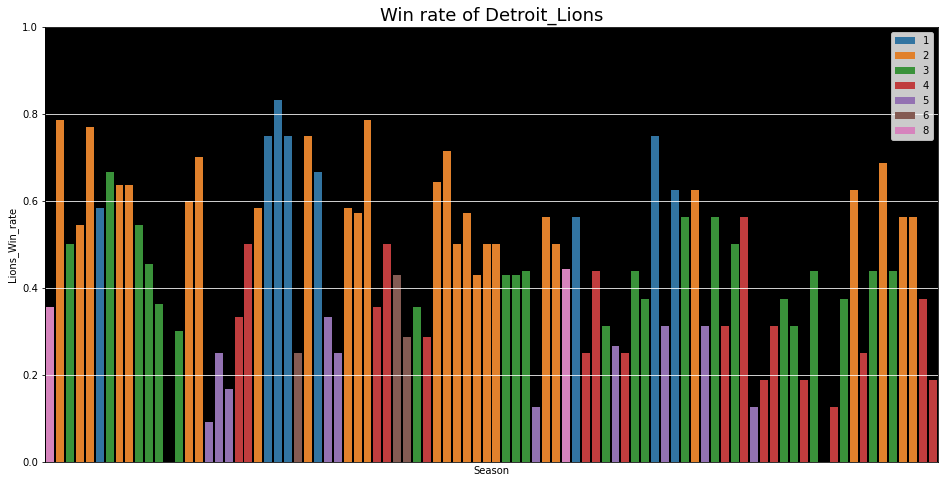

In [730]:
plt.figure(figsize = (16,8))
ax = sns.barplot(x="Season", y="Lions_Win_rate", data=DF_4_data, hue = 'Lions_Finish',dodge=False)
ax.set_facecolor("k")
ax.set(xticks = [])
plt.grid(True,color="w",alpha=1)
plt.title("Win rate of Detroit_Lions",color='k',fontsize=18)
plt.ylim(0,1)
plt.legend(loc='upper right')
plt.show()

c:\users\xiang fu\appdata\local\programs\python\python38-32\lib\site-packages\seaborn\relational.py:918: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.
  scout = ax.scatter([], [], **kws)
c:\users\xiang fu\appdata\local\programs\python\python38-32\lib\site-packages\seaborn\relational.py:955: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.
  points = ax.scatter(*args, **kws)


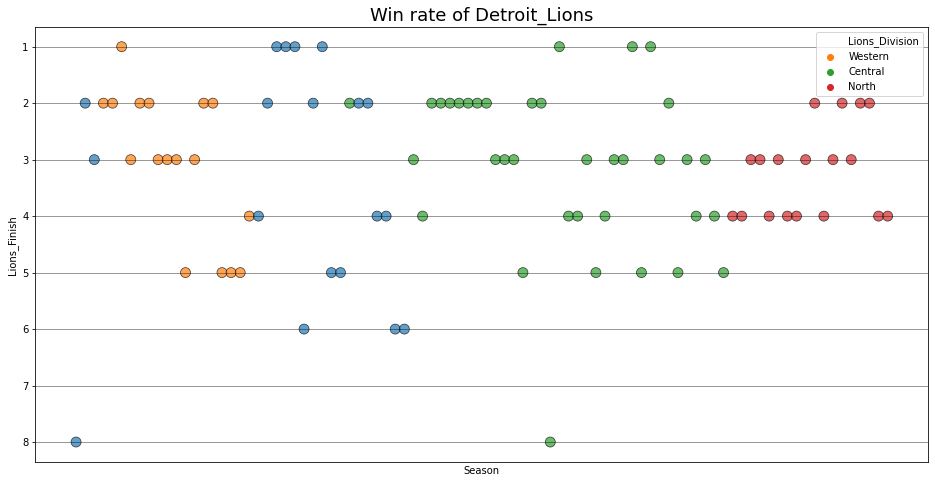

In [731]:
plt.figure(figsize = (16,8))
ax = sns.scatterplot(x="Season", y="Lions_Finish",hue = 'Lions_Division', data=DF_4_data, s=100,alpha=0.7,edgecolor="k"*len(DF_2_data))
ax.set_facecolor("w")
ax.set(xticks = [])
ax.invert_yaxis()
plt.grid(True,color="k",alpha=0.5)
plt.title("Win rate of Detroit_Lions",color='k',fontsize=18)
plt.show()

In [732]:
#Join all the data on the index of season
DF_a = pd.merge(DF_1_data, DF_2_data, on='Season', how='outer')
DF_b = pd.merge(DF_3_data, DF_4_data, on='Season', how='outer')
DF_c = pd.merge(DF_a, DF_b, on='Season', how='outer')
DF_c = DF_c.sort_values(by ='Season')

In [733]:
DF_c = DF_c.dropna()

DF_c.head() # the data is clean and valid now

,Season,Pistons_Division,Pistons_Finish,Pistons_Win_rate,Red_Wings_Division,Red_Wings_Finish,Red_Wings_Win_rate,Tigers_Division,Tigers_Finish,Tigers_Win_rate,Lions_Division,Lions_Finish,Lions_Win_rate
0,1948,Western,5.0,0.367,—,1.0,0.567,,5.0,0.506,Western,5.0,0.167
1,1949,Central,4.0,0.588,—,1.0,0.529,,4.0,0.565,Western,4.0,0.333
2,1950,Western,3.0,0.471,—,1.0,0.629,,2.0,0.617,,4.0,0.500
3,1951,Western,4.0,0.439,—,1.0,0.629,,5.0,0.474,,2.0,0.583
4,1952,Western,3.0,0.522,—,1.0,0.514,,8.0,0.325,,1.0,0.750


### Step3. Plot the figure for visualization of data

In [734]:
# use the plot of data to get first impression of the information of the data
x = DF_c['Season']
y = pd.DataFrame(DF_c[['Pistons_Win_rate','Red_Wings_Win_rate','Tigers_Win_rate','Lions_Win_rate']])

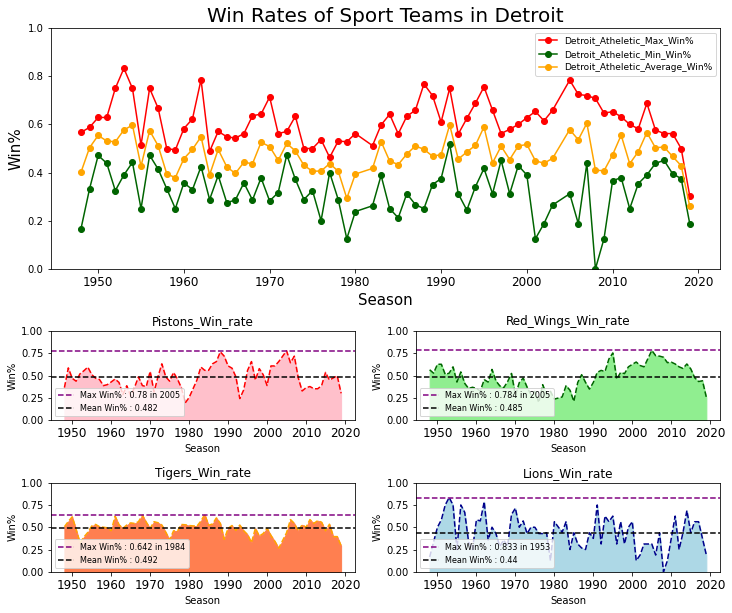

In [735]:
# set figure frame
fig = plt.figure(figsize = (12,10))
ax1 = plt.subplot2grid((4,2),(0,0), colspan = 2, rowspan = 2)
ax2 = plt.subplot2grid((4,2),(2,0))
ax3 = plt.subplot2grid((4,2),(2,1))
ax4 = plt.subplot2grid((4,2),(3,0))
ax5 = plt.subplot2grid((4,2),(3,1))
ax1.plot(x, y.max(axis = 1), '-o', c = 'red', alpha = 1,label = 'Detroit_Atheletic_Max_Win%')
ax1.plot(x, y.min(axis = 1), '-o', c = 'darkgreen', alpha = 1,label = 'Detroit_Atheletic_Min_Win%')
ax1.plot(x, y.mean(axis = 1), '-o',c = 'orange', alpha = 1,label = 'Detroit_Atheletic_Average_Win%')
ax1.legend(loc = 'best', frameon = True, fontsize =9)
ax1.set_ylim(0,1)
ax1.set_xlabel('Season', size = 15)
ax1.set_ylabel('Win%', size = 15)
ax1.set_title('Win Rates of Sport Teams in Detroit', size = 20)

# do some subplots for better understanding
ax = [ax2, ax3, ax4, ax5]
ax2.plot(x, y['Pistons_Win_rate'], '--', c = 'r', label = '_Hidden label')
ax3.plot(x, y['Red_Wings_Win_rate'], '--', c = 'darkgreen', label = '_Hidden label')
ax4.plot(x, y['Tigers_Win_rate'], '--', c = 'orange', label = '_Hidden label')
ax5.plot(x, y['Lions_Win_rate'], '--', c = 'darkblue', label = '_Hidden label')
ax2.fill_between(x,0,y['Pistons_Win_rate'], color = 'pink')
ax3.fill_between(x,0,y['Red_Wings_Win_rate'], color = 'lightgreen')
ax4.fill_between(x,0,y['Tigers_Win_rate'], color = 'coral')
ax5.fill_between(x,0,y['Lions_Win_rate'], color = 'lightblue')
titles = ['Pistons_Win_rate', 'Red_Wings_Win_rate', 'Tigers_Win_rate', 'Lions_Win_rate']


# Indicate the max and mean win% on the figure, *they can be put into a "for" loop

def getIndexes(DF_c, value):
    #Get index positions of value in dataframe
 
    listOfPos = list()
    # Get bool dataframe with True at positions where the given value exists
    result = DF_c.isin([value])
    # Get list of columns that contains the value
    seriesObj = result.any()
    columnNames = list(seriesObj[seriesObj == True].index)
    # Iterate over list of columns and fetch the rows indexes where value exists
    for col in columnNames:
        rows = list(result[col][result[col] == True].index)
        for row in rows:
            listOfPos.append(row)
    # Return a list of tuples indicating the positions of value in the dataframe
    return listOfPos

# find ax2 max and mean
ax2_max = round(y['Pistons_Win_rate'].max(),3)
ax2_index = getIndexes(DF_c, ax2_max)
ax2_max_index = DF_c['Season'][ax2_index[0]]

ax2_mean = round(y['Pistons_Win_rate'].mean(),3)
l2_max = ax2.axhline(ax2_max,color='purple',ls='--')
l2_mean = ax2.axhline(ax2_mean,color='black',ls='--')
l2_max.set_label('Max Win% : {} in {}'.format(ax2_max,ax2_max_index))
l2_mean.set_label('Mean Win% : {}'.format(ax2_mean))

# ax3
ax3_max = round(y['Red_Wings_Win_rate'].max(),3)
ax3_index = getIndexes(DF_c, ax3_max)
ax3_max_index = DF_c['Season'][ax3_index[0]]

ax3_mean = round(y['Red_Wings_Win_rate'].mean(),3)
l3_max = ax3.axhline(ax3_max,color='purple',ls='--')
l3_mean = ax3.axhline(ax3_mean,color='black',ls='--')
l3_max.set_label('Max Win% : {} in {}'.format(ax3_max,ax3_max_index))
l3_mean.set_label('Mean Win% : {}'.format(ax3_mean))

# ax4
ax4_max = round(y['Tigers_Win_rate'].max(),3)
ax4_index = getIndexes(DF_c, ax4_max)
ax4_max_index = DF_c['Season'][ax4_index[0]]

ax4_mean = round(y['Tigers_Win_rate'].mean(),3)
l4_max = ax4.axhline(ax4_max,color='purple',ls='--')
l4_mean = ax4.axhline(ax4_mean,color='black',ls='--')
l4_max.set_label('Max Win% : {} in {}'.format(ax4_max,ax4_max_index))
l4_mean.set_label('Mean Win% : {}'.format(ax4_mean))

# ax5
ax5_max = round(y['Lions_Win_rate'].max(),3)
ax5_index = getIndexes(DF_c, ax5_max)
ax5_max_index = DF_c['Season'][ax5_index[0]]

ax5_mean = round(y['Lions_Win_rate'].mean(),3)
l5_max = ax5.axhline(ax5_max,color='purple',ls='--')
l5_mean = ax5.axhline(ax5_mean,color='black',ls='--')
l5_max.set_label('Max Win% : {} in {}'.format(ax5_max,ax5_max_index))
l5_mean.set_label('Mean Win% : {}'.format(ax5_mean))

# add symbols
for i in range(len(ax)):
    ax[i].set_title(titles[i])
    ax[i].set_xlabel('Season')
    ax[i].set_ylabel('Win%')
    ax[i].set_ylim(0,1)
    ax[i].legend(loc = 3, fontsize =8)
plt.subplots_adjust(wspace= 0.2, hspace = 0.7)
plt.show()

### Step4. Explaination of the data and figure

The data of four sport teams of Detroit exhibits the win rate changes of all teams in a long-term period of 1948 - 2019.
On the overview, all of the teams have a long history and long-recorded of performance. But each Detroit sport team's average win rate is lower than 50%. The historic average win rate of all teams are in range of 40%-60%, however, it began to drop since 2015.
For each team:
 * The team has the best perfomance is Detroit Tigers, which has a relatively stable win rate around 49%, although its best win rate is the lowest among all teams;
 * Detroit Lions have the highest win rate of all in 1953, but its win rate changed very frequently (back and forth);
 * And both of Detroit Pistons and Detroit Red Wings have best win rate in 2005, and their recent performance are good (mostly higher than 50%).
 
The win rate of a sport team could be related to its management, property and local economy, etc., therefore the changes of win rate of a sport team could tell a story of these hiden information. The prediction of future win rate requires more attributes to fit into statistic models, to achieve this purpose, more works data collection and analysis are needed beforehead.

In [736]:
# Save Clean Data
DF_c.to_csv(r'C:\Users\Xiang Fu\Downloads\My-Projects-master\Sport teams.csv',index = False)